In [22]:
#Import Requirment Library
import pandas as pd
from datetime import date
from datetime import datetime
import matplotlib.pylab as plt

In [23]:
#Read All Data
dataframes=[]
for day in range(1, 6):
    df = pd.read_csv("Day{}_Trades_SPY.csv".format(day))
    dataframes.append(df)
    

In [24]:
#Check Columns
dataframes[0].head()

,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME
0,09:30:00.000744,455.69,100,Z,09:30:00.000467
1,09:30:00.000838,455.20,100,K,09:30:00.000457
2,09:30:00.001118,455.86,63,Z,09:30:00.000887
3,09:30:00.001128,455.17,105,Z,09:30:00.000887
4,09:30:00.001228,455.45,61,K,09:30:00.000935


In [25]:
#Check Columns If there is a date
dataframes[1].head()

,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME
0,09:30:00.017884,263.32,400,Z,09:30:00.017333
1,09:30:00.017910,263.65,200,K,09:30:00.017333
2,09:30:00.017934,263.71,100,K,09:30:00.017358
3,09:30:00.017959,263.62,200,X,09:30:00.017286
4,09:30:00.019794,263.56,16,Z,09:30:00.019314


In [26]:
#Add Date in as a new column
for day in range(0, 5):
    dataframes[day]["Day"]=day

In [27]:
#Concat DataFrames Because Working on would be easier
for day in range(1,5):
    dataframes[0]=pd.concat([dataframes[0], dataframes[day]])

In [28]:
#Change Variable Name So I dont have to use index :)
MyFrame=dataframes[0]
MyFrame

,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME,Day
0,09:30:00.000744,455.69,100,Z,09:30:00.000467,0
1,09:30:00.000838,455.20,100,K,09:30:00.000457,0
2,09:30:00.001118,455.86,63,Z,09:30:00.000887,0
3,09:30:00.001128,455.17,105,Z,09:30:00.000887,0
4,09:30:00.001228,455.45,61,K,09:30:00.000935,0
...,...,...,...,...,...,...
231399,16:00:00.306369,442.59,19,T,16:00:00.306017,4
231400,16:00:00.332998,442.34,81,T,16:00:00.332643,4
231401,16:00:00.567277,442.24,400,T,16:00:00.566928,4
231402,16:00:00.567277,442.30,119,T,16:00:00.566928,4


In [29]:
#General Checking Describes Of Numerical Features
MyFrame.describe()

,PRICE,SIZE,Day
count,3.962296e+06,3.962296e+06,3.962296e+06
mean,2.720530e+02,1.177388e+02,2.572522e+00
std,7.446108e+01,1.854391e+03,1.018851e+00
min,2.278100e+02,1.000000e+00,0.000000e+00
25%,2.345900e+02,1.900000e+01,3.000000e+00
50%,2.396000e+02,1.000000e+02,3.000000e+00
75%,2.643200e+02,1.000000e+02,3.000000e+00
max,4.588400e+02,2.094942e+06,4.000000e+00


In [30]:
#Data Type Checking Oh No Time is like string I need to convert it
MyFrame.dtypes

Time                 object
PRICE               float64
SIZE                  int64
EXCHANGE             object
PARTICIPANT_TIME     object
Day                   int64
dtype: object

In [31]:
#Here we go, Nano Second damaged Our Converting So I need to eleminate it then convert
MyFrame['Time'] = pd.to_datetime(df['Time']).dt.floor('S')

In [32]:
#Yes, Types Of Columns are What I want
MyFrame.dtypes

Time                datetime64[ns]
PRICE                      float64
SIZE                         int64
EXCHANGE                    object
PARTICIPANT_TIME            object
Day                          int64
dtype: object

In [33]:
#Do I Have Index Problem
MyFrame.head()

,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME,Day
0,2023-11-06 09:30:00,455.69,100,Z,09:30:00.000467,0
1,2023-11-06 09:30:00,455.20,100,K,09:30:00.000457,0
2,2023-11-06 09:30:00,455.86,63,Z,09:30:00.000887,0
3,2023-11-06 09:30:00,455.17,105,Z,09:30:00.000887,0
4,2023-11-06 09:30:00,455.45,61,K,09:30:00.000935,0


In [34]:
#I think so because I must have had about 3M but when I looked Last INdex it was just 231K 
MyFrame.tail()

,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME,Day
231399,2023-11-06 16:00:00,442.59,19,T,16:00:00.306017,4
231400,2023-11-06 16:00:00,442.34,81,T,16:00:00.332643,4
231401,2023-11-06 16:00:00,442.24,400,T,16:00:00.566928,4
231402,2023-11-06 16:00:00,442.30,119,T,16:00:00.566928,4
231403,2023-11-06 16:00:00,441.92,1015,T,16:00:00.847393,4


In [36]:
#Here We Go Reseting What A Freshing
MyFrame = MyFrame.reset_index()
MyFrame

In [38]:
#Day By Day Checking
MyFrame.groupby('Day').describe()

index                                                       \
         count       mean            std  min        25%        50%   
Day                                                                   
0     342068.0   171033.5   98746.670278  0.0   85516.75   171033.5   
1     314071.0   157035.0   90664.632535  0.0   78517.50   157035.0   
2     270851.0   135425.0   78188.093218  0.0   67712.50   135425.0   
3    2803902.0  1401950.5  809416.931579  0.0  700975.25  1401950.5   
4     231404.0   115701.5   66800.725183  0.0   57850.75   115701.5   

                                PRICE              ...                  \
            75%        max      count        mean  ...     75%     max   
Day                                                ...                   
0     256550.25   342067.0   342068.0  457.230434  ...  457.68  458.84   
1     235552.50   314070.0   314071.0  264.302808  ...  264.67  267.26   
2     203137.50   270850.0   270851.0  266.171165  ...  266.44  267.37   
3    2102925.75  2803901.0  2803902.0  236.866016  ...  240.05  248.49   
4     173552.25   231403.0   231404.0  442.078810  ...  442.36  443.22   

          SIZE                                                                
         count        mean          std  min    25%    50%    75%        max  
Day                                                                           
0     342068.0  111.335492  2343.927704  1.0   20.0  100.0  100.0  1347466.0  
1     314071.0  220.145604  2652.188500  1.0  100.0  100.0  200.0  1439916.0  
2     270851.0  220.516166  3359.572103  1.0  100.0  100.0  200.0  1714626.0  
3    2803902.0   96.937193  1385.585519  1.0   14.0   85.0  100.0  2094942.0  
4     231404.0  119.967097  2169.778142  1.0   20.0  100.0  100.0  1027179.0  

[5 rows x 24 columns]

In [81]:
#According to my fellings, Size doesn't let me know which days close which days far away
MyFrame.groupby('Day')['SIZE'].describe()

,count,mean,std,min,25%,50%,75%,max
Day,,,,,,,,
0,342068.0,111.335492,2343.927704,1.0,20.0,100.0,100.0,1347466.0
1,314071.0,220.145604,2652.188500,1.0,100.0,100.0,200.0,1439916.0
2,270851.0,220.516166,3359.572103,1.0,100.0,100.0,200.0,1714626.0
3,2803902.0,96.937193,1385.585519,1.0,14.0,85.0,100.0,2094942.0
4,231404.0,119.967097,2169.778142,1.0,20.0,100.0,100.0,1027179.0


In [83]:
#Checking Volume Day By Day Maybe we will find good knowledge
VOLUME = MyFrame.groupby(['EXCHANGE', 'Day'])['SIZE'].describe()
VOLUME

count        mean         std  min    25%    50%    75%  \
EXCHANGE Day                                                               
A        0      1735.0  146.767147  544.345771  1.0   10.0   98.0  100.0   
         1       685.0  139.464234  186.912747  1.0  100.0  100.0  100.0   
         2       950.0  120.907368  100.101212  1.0  100.0  100.0  100.0   
         3      7201.0   98.788779  167.431061  1.0   87.0  100.0  100.0   
         4       990.0  154.627273  505.781656  1.0   13.0  100.0  100.0   
...                ...         ...         ...  ...    ...    ...    ...   
Z        0     41444.0   97.525625  140.563661  1.0   29.0  100.0  100.0   
         1     45608.0  182.010218  262.603938  1.0  100.0  100.0  200.0   
         2     39185.0  193.042771  308.798018  1.0  100.0  100.0  200.0   
         3    389628.0   90.633407  159.827312  1.0   30.0  100.0  100.0   
         4     22897.0  114.140979  140.238509  1.0   69.0  100.0  100.0   

                  max  
EXCHANGE Day           
A        0    10000.0  
         1     2700.0  
         2     1000.0  
         3     7000.0  
         4     7347.0  
...               ...  
Z        0     4809.0  
         1     7000.0  
         2    13300.0  
         3    15594.0  
         4     5128.0  

[70 rows x 8 columns]

In [84]:
#Checking Volume is in Process
for i in MyFrame['EXCHANGE'].unique():
    print((20-len(i))*'-',' ',i,' ',(20-len(i))*'-')
    print(VOLUME.loc[i][:])
    print((40-len(i))*'-')

-------------------   Z   -------------------
        count        mean         std  min    25%    50%    75%      max
Day                                                                     
0     41444.0   97.525625  140.563661  1.0   29.0  100.0  100.0   4809.0
1     45608.0  182.010218  262.603938  1.0  100.0  100.0  200.0   7000.0
2     39185.0  193.042771  308.798018  1.0  100.0  100.0  200.0  13300.0
3    389628.0   90.633407  159.827312  1.0   30.0  100.0  100.0  15594.0
4     22897.0  114.140979  140.238509  1.0   69.0  100.0  100.0   5128.0
---------------------------------------
-------------------   K   -------------------
        count        mean         std  min    25%    50%    75%      max
Day                                                                     
0     31363.0   89.010618  127.744856  1.0   20.0  100.0  100.0   7246.0
1     29712.0  178.161551  349.431800  1.0  100.0  100.0  200.0  15000.0
2     27509.0  189.227489  517.248326  1.0  100.0  100.0  200.0  

In [88]:
#According to my fellings, Price is so changebla. it must be great idea to reilaze which days close which days far away
PRICES = MyFrame.groupby(['EXCHANGE', 'Day'])['PRICE'].describe()
PRICES

count        mean       std     min     25%      50%  \
EXCHANGE Day                                                            
A        0      1735.0  457.410496  0.558271  455.20  457.08  457.440   
         1       685.0  264.126467  0.487518  263.23  263.77  264.020   
         2       950.0  266.253495  0.404887  264.99  266.00  266.265   
         3      7201.0  237.164176  3.408570  228.36  234.01  237.810   
         4       990.0  442.112061  0.398966  441.06  441.84  442.100   
...                ...         ...       ...     ...     ...      ...   
Z        0     41444.0  457.224206  0.636105  455.05  456.84  457.300   
         1     45608.0  264.291666  0.509374  263.15  263.89  264.260   
         2     39185.0  266.163732  0.411231  264.84  265.92  266.180   
         3    389628.0  237.023717  4.198127  227.87  233.37  237.620   
         4     22897.0  442.051907  0.396272  440.92  441.77  442.050   

                   75%     max  
EXCHANGE Day                    
A        0    457.8000  458.65  
         1    264.4700  265.72  
         2    266.5300  267.13  
         3    239.7600  246.93  
         4    442.3875  443.04  
...                ...     ...  
Z        0    457.6700  458.84  
         1    264.6600  265.87  
         2    266.4400  267.25  
         3    240.1700  246.24  
         4    442.3300  443.19  

[70 rows x 8 columns]

In [89]:
#Checking Price is in Process
for i in MyFrame['EXCHANGE'].unique():
    print((20-len(i))*'-',' ',i,' ',(20-len(i))*'-')
    print(PRICES.loc[i][:])
    print((40-len(i))*'-')

-------------------   Z   -------------------
        count        mean       std     min     25%     50%     75%     max
Day                                                                        
0     41444.0  457.224206  0.636105  455.05  456.84  457.30  457.67  458.84
1     45608.0  264.291666  0.509374  263.15  263.89  264.26  264.66  265.87
2     39185.0  266.163732  0.411231  264.84  265.92  266.18  266.44  267.25
3    389628.0  237.023717  4.198127  227.87  233.37  237.62  240.17  246.24
4     22897.0  442.051907  0.396272  440.92  441.77  442.05  442.33  443.19
---------------------------------------
-------------------   K   -------------------
        count        mean       std     min     25%     50%     75%     max
Day                                                                        
0     31363.0  457.191198  0.639707  455.01  456.80  457.27  457.65  458.83
1     29712.0  264.287740  0.505963  263.16  263.89  264.25  264.66  265.86
2     27509.0  266.191346  0.406

In [90]:
#We are only evaluating the modem days, we can delete another column so it will be easier for my laptop. 
#But Don't forget If these days includes day after day days, 
#it probaly before close price should be same that day open price or close
MyGraphFrame = MyFrame.drop(['PARTICIPANT_TIME','Time'], axis=1)

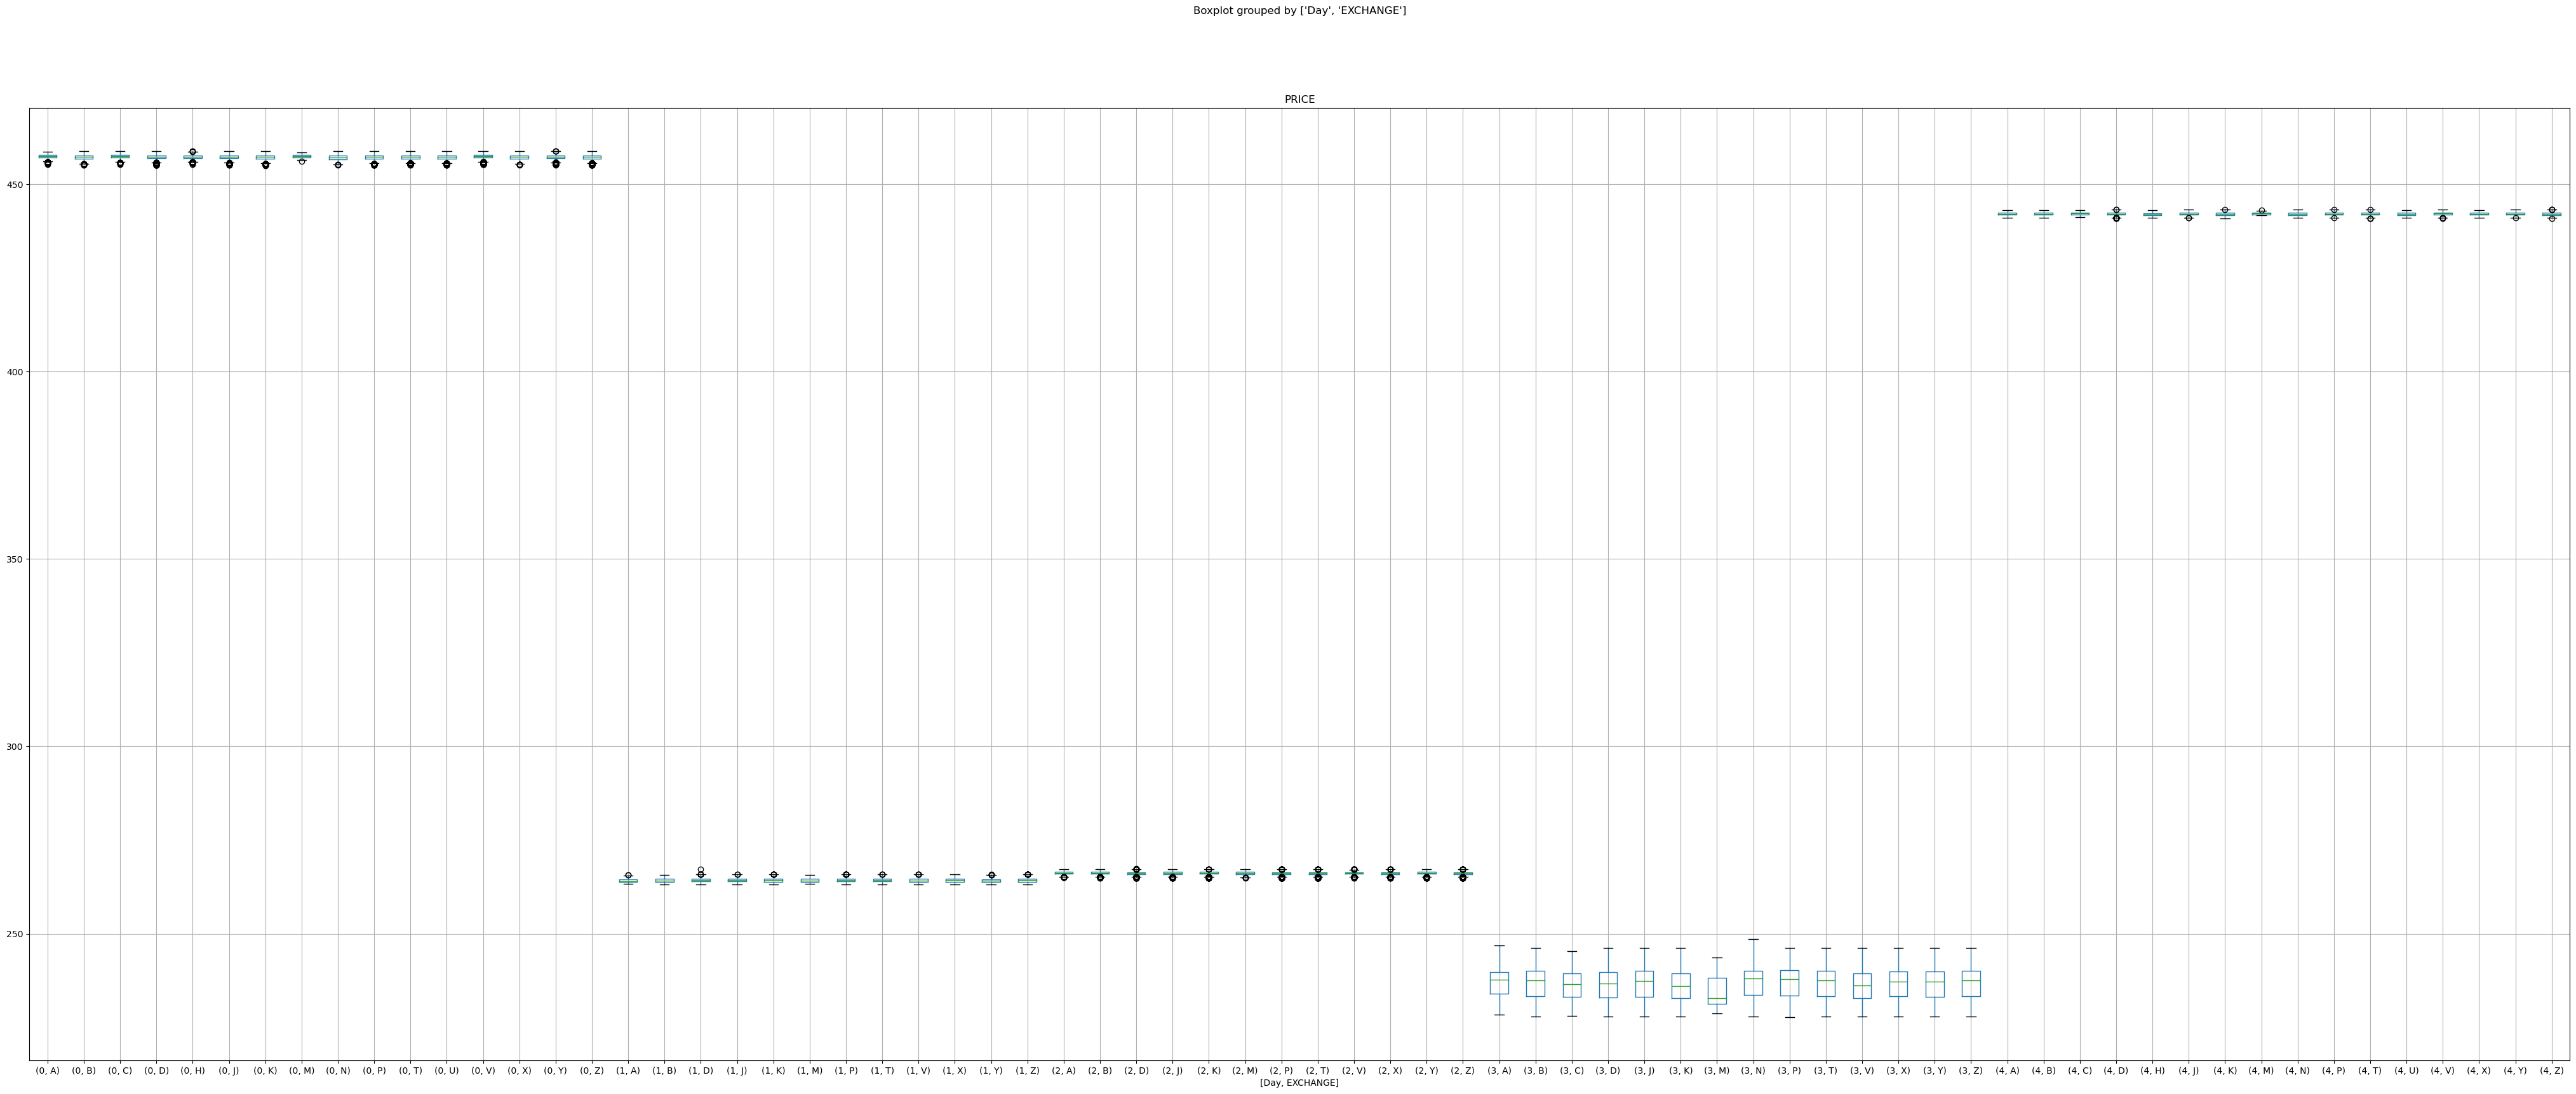

In [91]:
#This Graphs is really helpfull to guess which day close which not
MyGraphFrame.boxplot(column=['PRICE'], by=['Day', 'EXCHANGE'])

plt.rcParams['figure.figsize'] = [50, 20]
plt.rcParams['figure.dpi'] = 100 
plt.show()

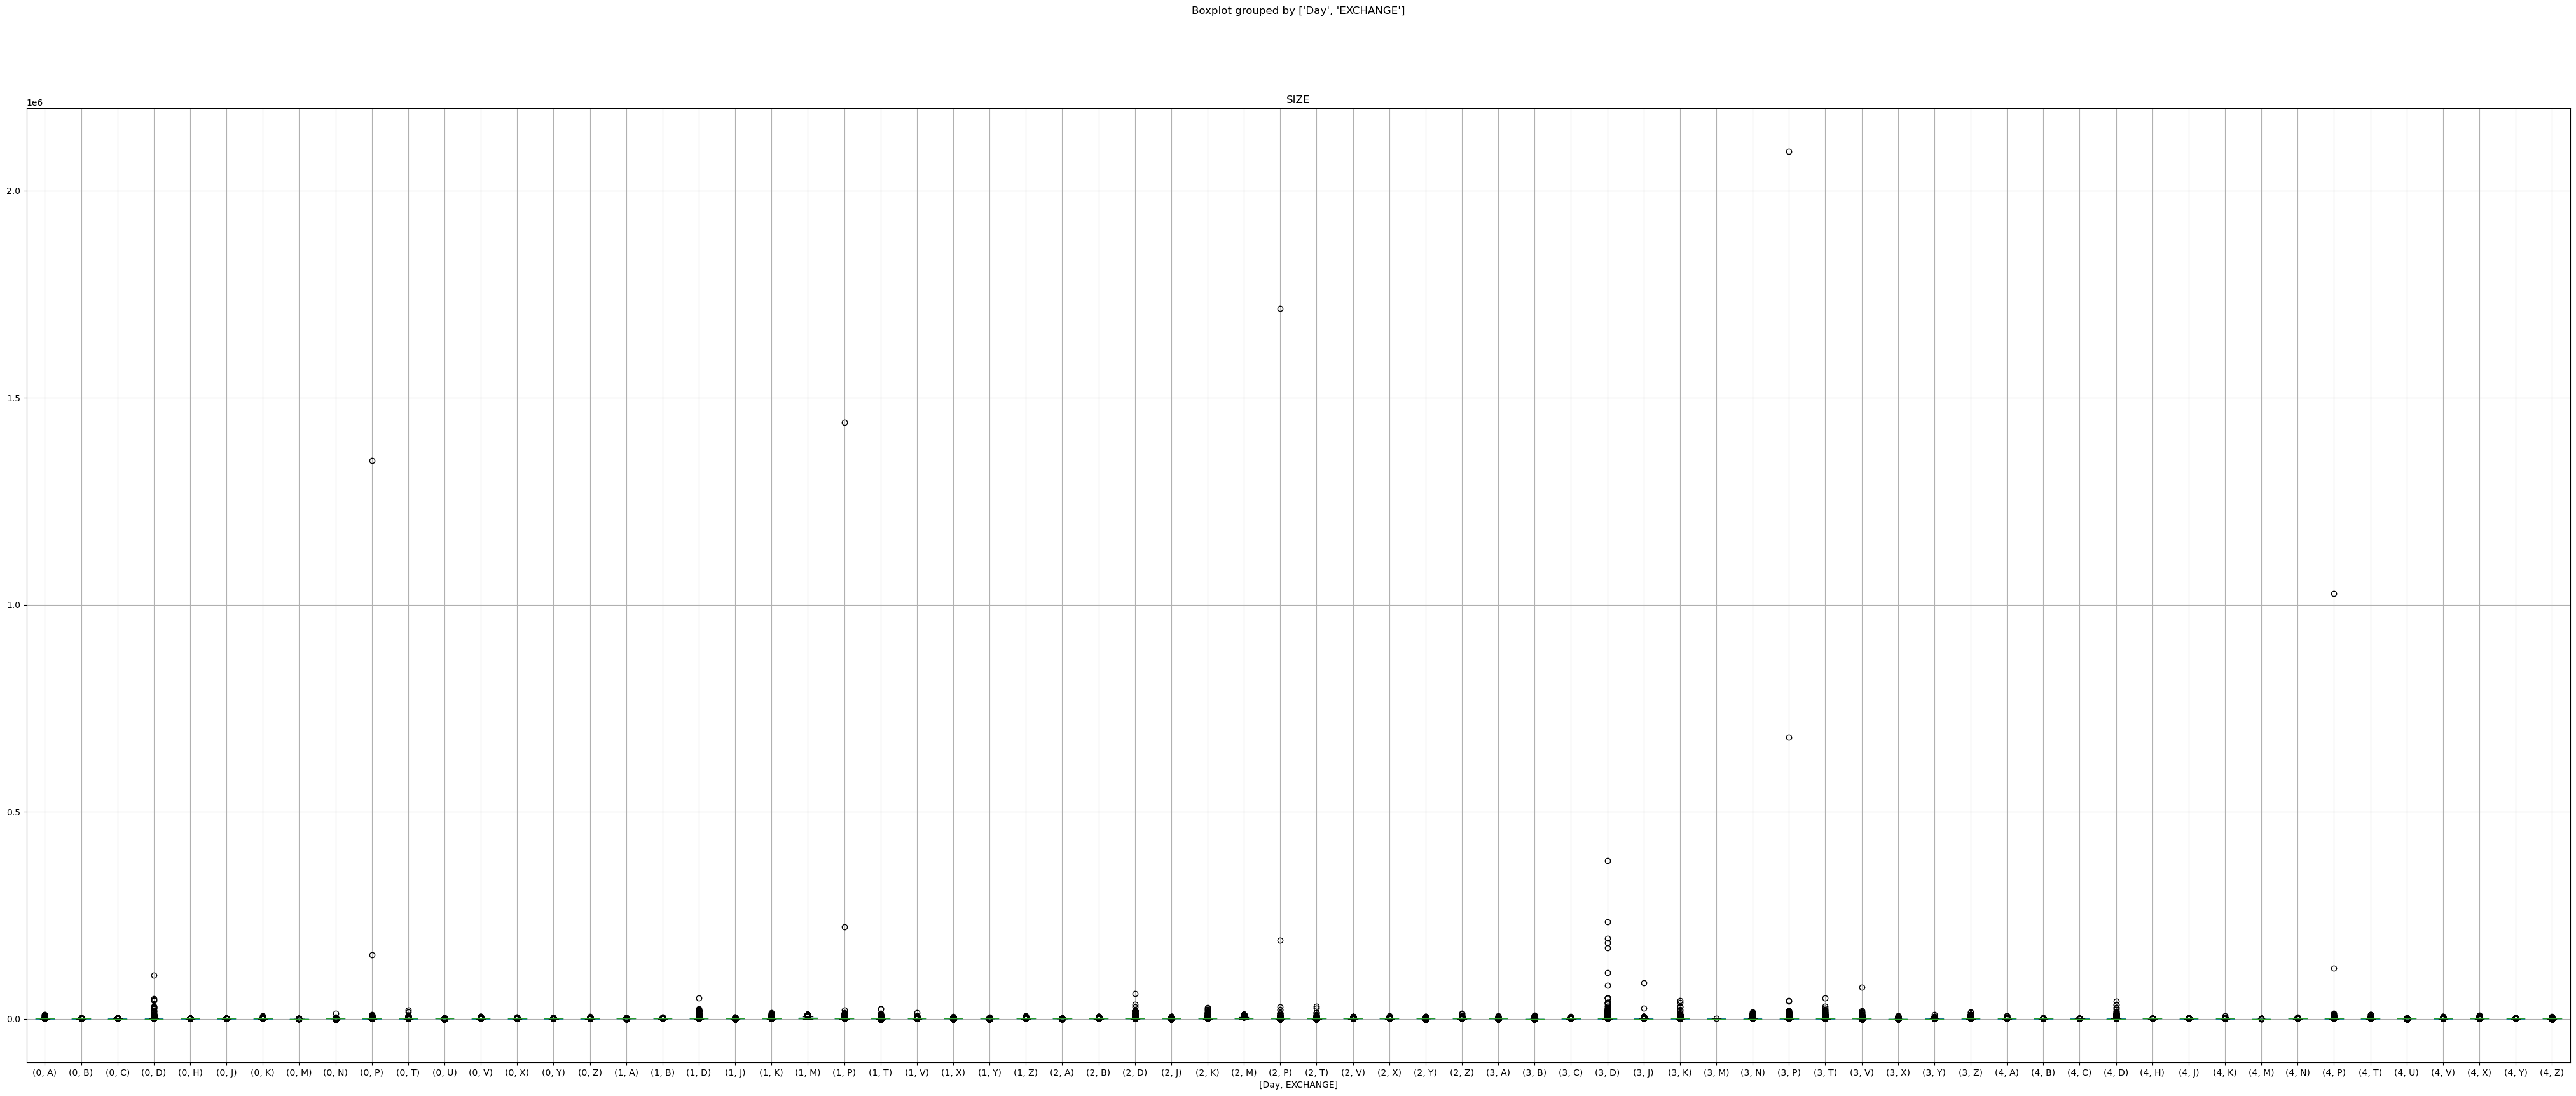

In [92]:
#as I said, Size doesnt give an idea to guess
MyGraphFrame.boxplot(column=['SIZE'], by=['Day', 'EXCHANGE'])

plt.rcParams['figure.figsize'] = [50, 20]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.show()

# Give some summary statistics describing each days’ worth of data ?

In [93]:
MyFrame.groupby('Day').describe()

index                                                       \
         count       mean            std  min        25%        50%   
Day                                                                   
0     342068.0   171033.5   98746.670278  0.0   85516.75   171033.5   
1     314071.0   157035.0   90664.632535  0.0   78517.50   157035.0   
2     270851.0   135425.0   78188.093218  0.0   67712.50   135425.0   
3    2803902.0  1401950.5  809416.931579  0.0  700975.25  1401950.5   
4     231404.0   115701.5   66800.725183  0.0   57850.75   115701.5   

                                PRICE              ...                  \
            75%        max      count        mean  ...     75%     max   
Day                                                ...                   
0     256550.25   342067.0   342068.0  457.230434  ...  457.68  458.84   
1     235552.50   314070.0   314071.0  264.302808  ...  264.67  267.26   
2     203137.50   270850.0   270851.0  266.171165  ...  266.44  267.37   
3    2102925.75  2803901.0  2803902.0  236.866016  ...  240.05  248.49   
4     173552.25   231403.0   231404.0  442.078810  ...  442.36  443.22   

          SIZE                                                                
         count        mean          std  min    25%    50%    75%        max  
Day                                                                           
0     342068.0  111.335492  2343.927704  1.0   20.0  100.0  100.0  1347466.0  
1     314071.0  220.145604  2652.188500  1.0  100.0  100.0  200.0  1439916.0  
2     270851.0  220.516166  3359.572103  1.0  100.0  100.0  200.0  1714626.0  
3    2803902.0   96.937193  1385.585519  1.0   14.0   85.0  100.0  2094942.0  
4     231404.0  119.967097  2169.778142  1.0   20.0  100.0  100.0  1027179.0  

[5 rows x 24 columns]

# Q: Investigate whatever properties of the data you find interesting ?

### Answer:
### Price is striking

# Q: Do any of these days seem “unusual” in any sense compared to the others? Do you think any of these might represent days that are close together in time? Do you think any of these might represent days that are very far apart in time? Explain your reasoning. 

### Answer:
### Yes, Day 4 is clearly a different day. This day's data should be separate from other days. also its range is pretty large.
### (Day 2 and Day 3) are reasonably close to each other.
### (Day 1 and Day 5) may be close days. Even though day 5 and day 1 are not as close as day 2 and day 3. 
### I relaized Thoose From below Boxplot

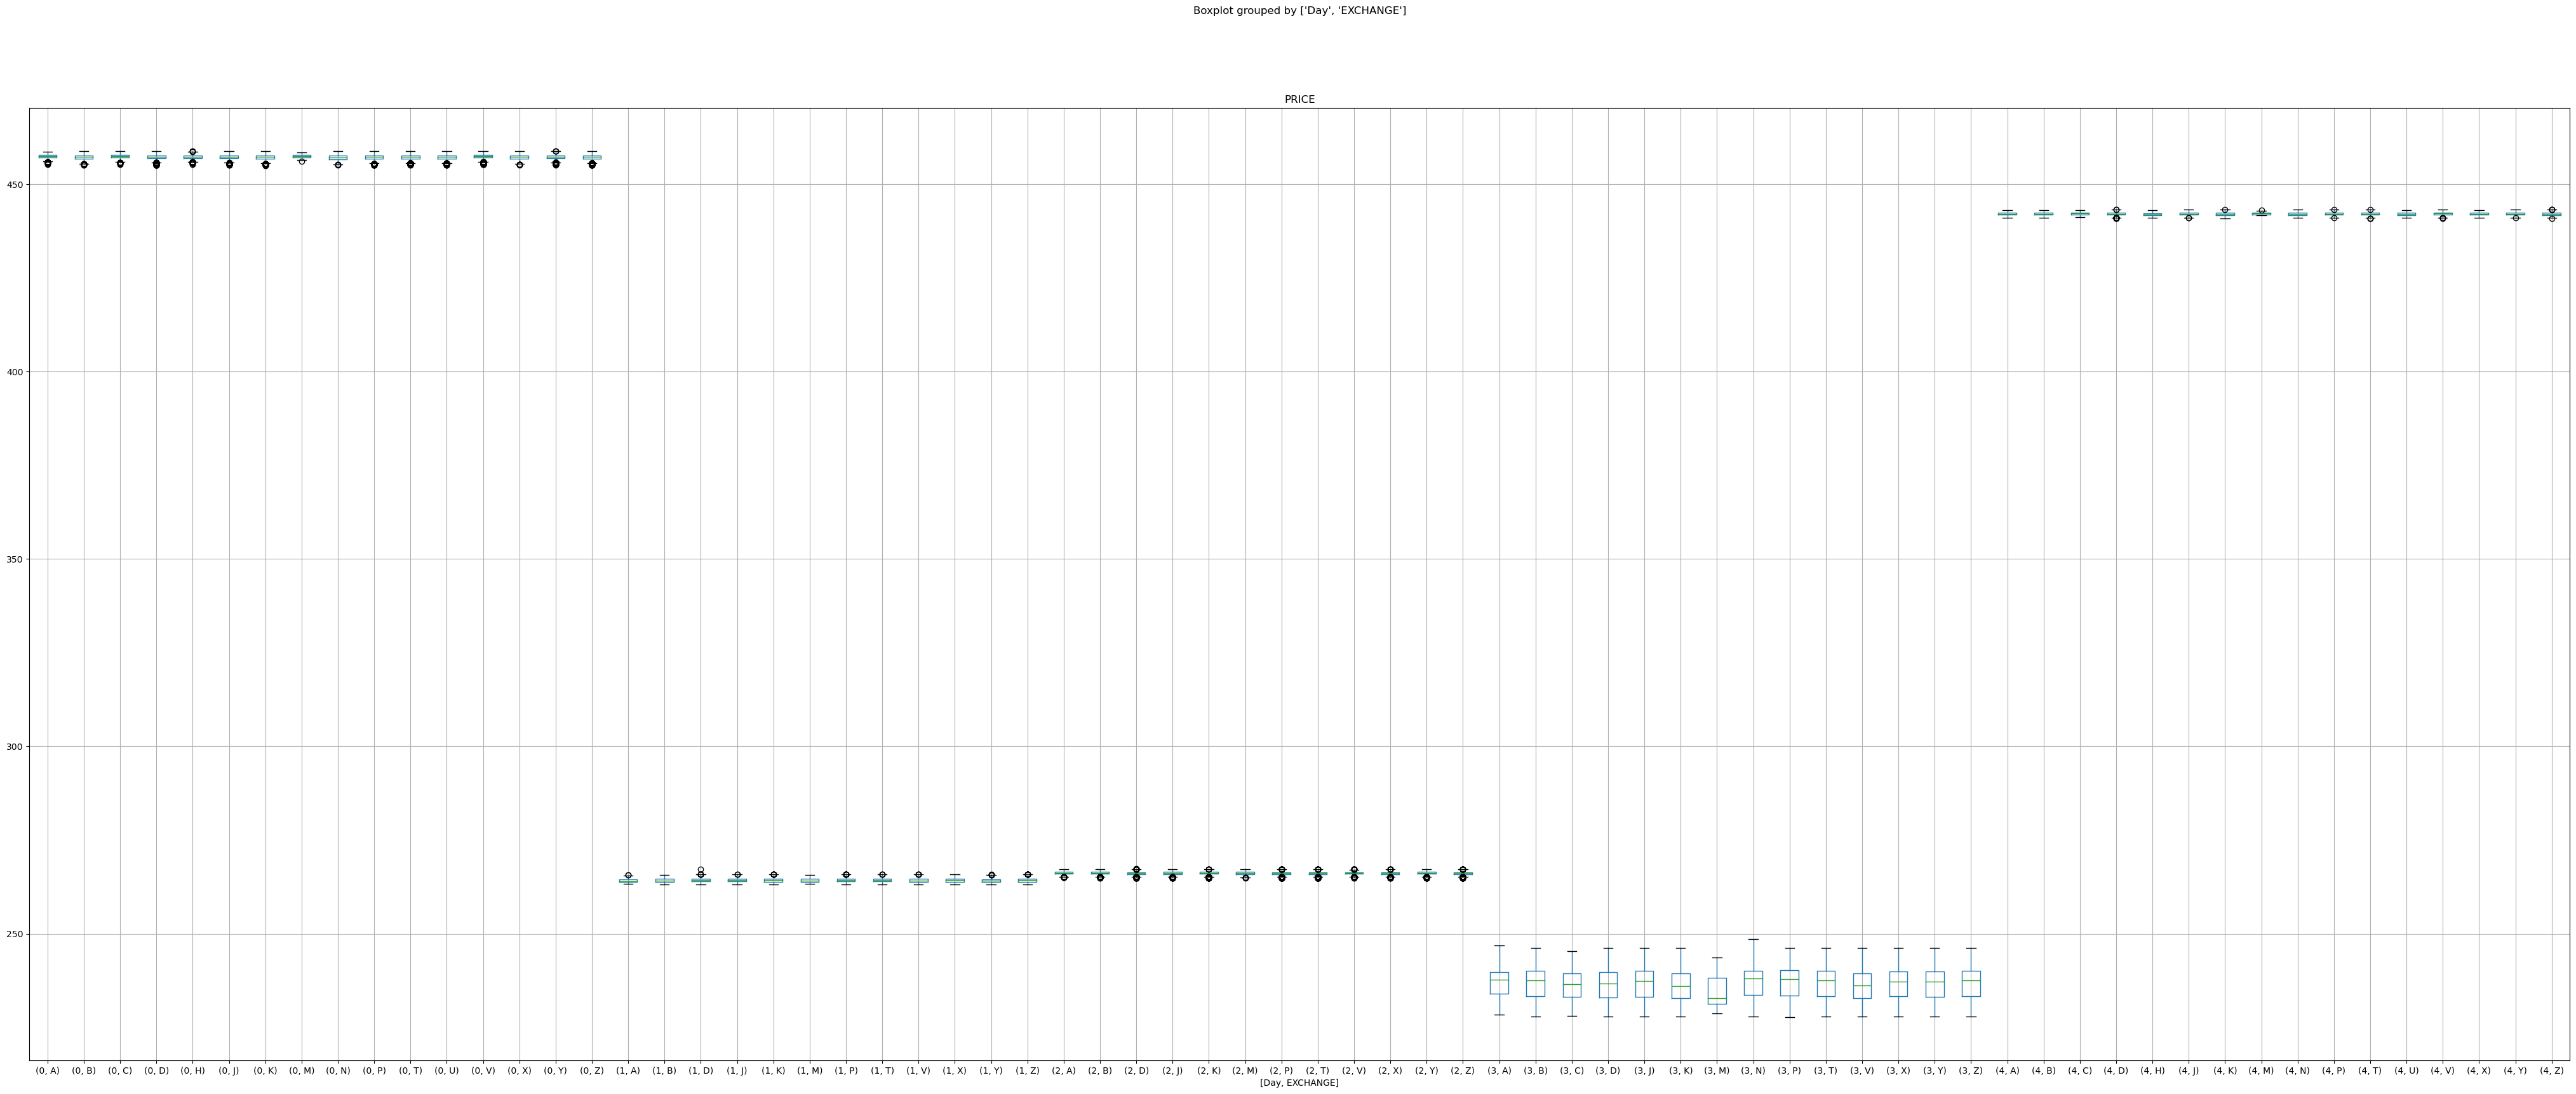

In [97]:
MyGraphFrame.boxplot(column=['PRICE'], by=['Day', 'EXCHANGE'])

plt.rcParams['figure.figsize'] = [50, 20]
plt.rcParams['figure.dpi'] = 100 
plt.show()